In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/md-lorente/data/master/datos_facturas.csv"

ventas_df = pd.read_csv(url, sep=";", parse_dates = ["fecha"])
ventas_df.head(10)

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,2010-01-01,Enero,clienteA,si,100,normal,18,18,118
1,2,2010-02-01,Enero,clienteB,no,150,normal,18,27,177
2,3,2010-03-01,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,2010-04-01,Enero,clienteD,si,200,normal,18,36,236
4,5,2010-05-01,Enero,clienteA,no,125,normal,18,"22,5","147,5"
5,6,2010-06-01,Enero,clienteB,si,100,reducido,8,8,108
6,7,2010-07-01,Enero,clienteC,si,175,reducido,8,14,189
7,8,2010-08-01,Enero,clienteD,no,200,normal,18,36,236
8,9,2010-09-01,Enero,clienteA,si,100,normal,18,18,118
9,10,2010-10-01,Enero,clienteB,si,100,normal,18,18,118


In [ ]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               45 non-null     int64         
 1   fecha            45 non-null     datetime64[ns]
 2   mes              45 non-null     object        
 3   cliente          45 non-null     object        
 4   factura_pagada   45 non-null     object        
 5   importe_factura  45 non-null     int64         
 6   tipo_IVA         45 non-null     object        
 7   porcentaje_IVA   45 non-null     int64         
 8   IVA              45 non-null     object        
 9   total_pagado     45 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.6+ KB


In [ ]:
ventas_df.isnull().values.any()

False

En esta exploración primaria del dataset se puede notar que no hay valores nulos en el mismo.

In [ ]:
#Convierto a base numérica las variables que voy a usar principalmente

ventas_df["total_pagado"].replace(",",".", inplace=True, regex=True)
ventas_df["total_pagado"] = ventas_df["total_pagado"].astype(np.float64)

ventas_df["IVA"].replace(",",".", inplace=True, regex=True)
ventas_df["IVA"] = ventas_df["IVA"].astype(np.float64)



Fecha : variable estadística cuantitativa continua que a nivel de análisis se toma como variable analítica

Mes: Al igual que fecha, es una variable cuantitativa continua pero que se toma de forma analítica para el análisis de datos

Cliente: Variable estadística cualitativa nominal. Analítica para el análisis de datos

Factura_Pagada: Variable dicotómica asimétrica (uno declara la ausencia del otro). A efectos del análisis es una variable analítica

Importe_factura: Variable cuantitativa continua y utilizada como variable cuantitativa a efectos de su análisis

Tipo_IVA: Variable dicotómica simétrica (Si bien siguen un orden, la variable no indica la ausencia/presencia de algo; ambas tienen sus propias características). A su vez, se supone que ambos valores son los únicos posibles para esta variable (normal y reducido). 
	 A efectos del análisis de datos es una variable analítica

Porcentaje IVA: Variable cuantitativa continua. A efectos del análisis es una variable cuantitativa

IVA: Variable cuantitativa continua que se toma como cuantitativa para su análisis

Total_pagado: Variable cuantitativa continua que se toma como cuantitativa para su análisis

In [ ]:
# Indica las medidas de centralización: media, mediana y moda. 

# Estudio de las principales medidas (Cuartiles, mínimo, máximo, media, recuento y desv. estandar)
print(ventas_df["total_pagado"].describe())

# Por esta parte, se calcula la media. En este caso, la moda es tomada por dos valores que tienen la misma frecuencia.

print("""\nModa: {} , {} \nAmbos valores se repiten la misma cantidad de veces""".\
      format(ventas_df["total_pagado"].mode()[0],\
             ventas_df["total_pagado"].mode()[1]))

#Cálculo de la mediana (que es igual al 2do cuartil)

print("\nMediana: {}".format(ventas_df["total_pagado"].median()))

count     45.000000
mean     147.308889
std       57.936116
min       29.500000
25%      108.000000
50%      135.000000
75%      189.000000
max      236.000000
Name: total_pagado, dtype: float64

Moda: 118.0 , 236.0 
Ambos valores se repiten la misma cantidad de veces

Mediana: 135.0


A partir de las medidas tomadas anteriormente, se puede notar que:

1) El valor central (por posición de la distribución) es 135. Se podría decir que hasta ese punto se acumula el 50% del total de las factuas pagadas.

2) La moda, que son los valores mas repetidos, corresponde a una forma bimodal que toma los valores 118 y 236. Esto de alguna manera puede ayudar a explicar también la media aritmética.

3) La media es de 147,308889. En el punto 2 se dice que la moda puede explicar en parte la media y se debe principalmente al hecho de que ambos valores influyen de manera considerable en el cálculo de la misma. Como se puede ver en la distribución de frecuencias de debajo, ambos valores se repiten 8 veces. Esto hace que la media se posicione entre medio de ellos. Un motivo importante que hace que la media no esté tan cercana a 236 es el hecho de que hay varios valores pequeños que pesan en el cálculo de la media (ej.: 29,5 ; 32,4 ; etc.) 

In [ ]:
frec_abs_df = pd.DataFrame(ventas_df["total_pagado"].copy())

frec_abs_df["Frec Absoluta"] = frec_abs_df.groupby("total_pagado")["total_pagado"].transform("count")
frec_abs_df.drop_duplicates(subset= "total_pagado", inplace=True)
frec_abs_df.sort_values(by= "total_pagado")

,total_pagado,Frec Absoluta
43,29.5,1
44,32.4,1
42,59.0,1
2,88.5,6
5,108.0,4
0,118.0,8
20,135.0,2
4,147.5,4
1,177.0,6
6,189.0,2


In [ ]:
#Indica las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación.

#Rango (tomando rango como la distancia entre el mínimo y el máximo, a diferencia del rango intercuartílico)
print("El valor del rango es: {}".format(ventas_df["total_pagado"].max() - ventas_df["total_pagado"].min()))

#Varianza
print("Varianza: {}".format(ventas_df["total_pagado"].var()))

#Desv Típica
print("Desviación típica: {}".\
      format(\
             round(ventas_df["total_pagado"].std(),4)\
             ))

#Coeficiente de variación = Desv estandar / Media 
print("Coeficiente de variación: {}".format(ventas_df["total_pagado"].std() / ventas_df["total_pagado"].mean()))

El valor del rango es: 206.5
Varianza: 3356.5935555555566
Desviación típica: 57.9361
Coeficiente de variación: 0.39329681050279197


El rango por si mismo da únicamente una noción de dispersión de los datos en términos "brutos" y no relativos. Dicho esto, nos muestra la amplitud que se genera entre el valor máximo y mínimo de una distribución pero no ahonda en la importancia relativa de esos valores. En este caso en particular, podemos decir que la ditribución abarca una amplitud de 206.5 $ pero a partir de esta medida no podemos determinar si los valores extremos tienen un peso importante o no en la distribución.

La varianza por si misma es el cuadrado de las diferencias de los valores respecto a la media. Si bien el valor en este caso es alto (3356,5936) no podemos decir que esto se traduce en una alta desviación ya que en la práctica resulta ser poco explicativa. Para tomar la medida de dispersión, se suele utilizar la desviación típica.

En este caso, podemos decir que los valores, siguiendo la campana de Gauss, donde se concentran la mayor cantidad de datos alrededor de la media es de +/- 57,9361.

Por último, el coeficiente de variación ronda el 0,3933 (aproximando a 4 cifras, un 39,33 %). Dado esto, podemos decir que los datos tienden a ser homogéneos en lo que refiere al total pagado y que la media aritmética del dataset es una cifra representativa de la distribución analizada.


In [ ]:
#Indica las medidas de posición: 
# rango intercuartílico, cuartil primero y decil 3. ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?

#Rango intercuartílico
print("IQR: {}".format(ventas_df["total_pagado"].quantile(.75)-
                       ventas_df["total_pagado"].quantile(.25)))

print("\nPrimer cuartil: {}".format(ventas_df["total_pagado"].quantile(0.25)))

print("\nDecil tercero: {}".format(ventas_df["total_pagado"].quantile(0.30)))

#Para obtener la factura que tiene como mínimo el 10% del total de facturas hay que buscar el decil 9 (90%)

print("\nDecil 9: {}".format(ventas_df["total_pagado"].quantile(0.9)))


IQR: 81.0

Primer cuartil: 108.0

Decil tercero: 118.0

Decil 9: 236.0


El rango intercuartílico es la diferencia entre el tercer cuartil y el primero. En este rango estarían concentrados entonces el 50% de los datos de la distribución. Se puede ver que es bastante menor al rango (206,5 vs 81) y es por el hecho de que no toma valores extremos sino que solamente se centra en los valores cercanos a la mediana. Esto hace que el IQR sea un estadístico robusto, poco sensible a ese tipo de valores, y que nos de una idea de la amplitud de la distribución central del dataset.

Con respecto a la pregunta que pide aquella factura que concentra como mínimo el 10% del total pagado, lo que estamos buscando es aquel dato que representa el umbral donde se encuentra el "top 10%" de facturas. En este caso, el valor coincide también con el valor máximo de la distribución.

Asimetría: 0.09644182245694456
Curtosis: -0.7990963830478419

------------------------------------------------------------------------------------------------------------------------


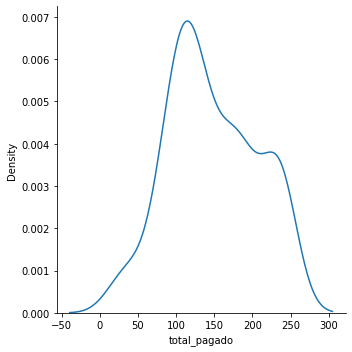

In [ ]:
# Indica las medidas de concentración y forma: curtosis, asimetría y un gráfico.

#Asimetría
print("Asimetría: {}".format(ventas_df["total_pagado"].skew()))

#Curtosis
print("Curtosis: {}".format(ventas_df["total_pagado"].kurt()))

print("\n"+"-"*120)

sns.displot(ventas_df["total_pagado"], kind="kde", bw_adjust = .85)
#Se ajusta el smoothing minimamente para mostrar el quiebre en 236; valor que es bastante frecuente en la distribución.
#En el gráfico también se nota de manera explícita la asimetría positiva y también la forma platicúrtica que tiene debido a la existencia de otros valores
#Frecuentes (ej.:236).

plt.show()

A nivel conceptual, la asimetría nos da una noción sobre la forma de la distribución respecto a la media. Busca entender si la distribución se comporta de forma similar tanto por encima como por debajo de la media. En este caso particular, podemos notar que es una asimetría positiva (0,09644182245694456) que se traduce en una mayor asimetría hacia la derecha de la media. Esto se puede notar gráficamente en la parte superior y se puede explicar principalmente al hecho de tener valores altamente frecuentes (236) por encima de la media.

Por otro lado, la curtosis busca explicar cómo están concentrados los datos respecto a la campana de Gauss. En este caso, al tener una distribución bimodal, se influye en la forma platicúrtica del data set debido a que ambas generan peso relativo a ambos lados de la moda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


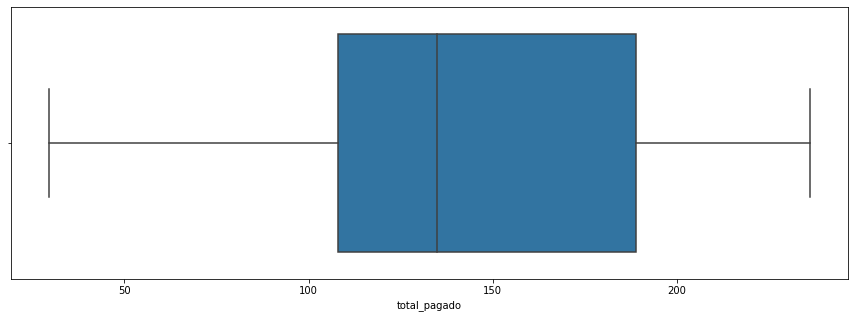

In [ ]:
# Realiza un análisis rápido con box-plot y sus medidas.

fig = plt.figure(figsize= (15,5))

sns.boxplot(ventas_df["total_pagado"])

fig.show()

En este diagrama de cajas, se refleja claramente algunos parámetros que fueron calculados inicialmente. Tanto los cuartiles como el rango se muestran de manera clara aquí. 

Por otra parte, el diagrama no señala valores extremos; todos se encuentran por encima del cerco inferior y por debajo del superior. Dado que no los superan, tanto el mínimo como el máximo pasan a ser esos cercos.

Esto se puede constatar al hacer los cálculos matemáticos.

IQR == 81

Cerco inferior == Q1 - IQRx1.5 == 108 - 121.5 == -13.5

Cerco superior == Q3 + IQRX1.5 == 189 + 121.5 == 310.5

Mínimo --> 29.5 (Por encima del cerco superior) 

Máximo --> 236 (Por debajo del cerco superior)

Por último, dentro de la caja se concentran la mayoría de los datos, lo cual también puede ser confirmado por el gráfico de frecuencias de la celda anterior. El único valor que "trastoca" la dist. de frecuencias es 236; el cual también explica la forma platicúrtica de las frecuencias.

In [ ]:
# Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.

#Antes de realizar el recuento, reviso si no hay valores distintos a si/no (ante, por ejemplo, un posible error de tipeo o valor no previsto)
print(ventas_df["factura_pagada"].unique())

print(ventas_df.loc[(ventas_df["factura_pagada"]== "si"),["cliente","total_pagado"]]\
                                                                              .groupby("cliente").sum("total_pagado")\
                                                                              .sort_values("total_pagado", ascending=False))

#Tanto el cliente A como el D han pagado 1534 en total y son, por lo tanto, los clientes que mas dinero han gastado.

['si' 'no']
          total_pagado
cliente               
clienteA        1534.0
clienteD        1534.0
clienteB         924.0
clienteC         584.5


Al agrupar por cliente y generar la sumatoria del total pagado por cada uno de ellos, llegamos a la conclusión de que tanto el cliente "A" como el cliente "D" han sido los que mayor monto han gastado (1534 $ Cada uno).

In [ ]:
#¿Quién es el cliente que más facturas no ha pagado en el mes de febrero?


#Filtrando el df por el mes de febrero. Posteriormente se agrupa por cliente para aplicar una función lambda que recuente los valores
#factura_pagada== "no"

print(ventas_df[(ventas_df["mes"] == "Febrero")].\
                                          groupby("cliente")\
                                          ["factura_pagada"].\
                                          apply(lambda x: x[x == "no"].count()).\
                                          sort_values(ascending = False))

print(len(ventas_df[(ventas_df["cliente"] == "clienteC") & (ventas_df["mes"] == "Febrero")]))

cliente
clienteC    2
clienteA    1
clienteB    1
clienteD    1
Name: factura_pagada, dtype: int64
3


In [ ]:
print(ventas_df[(ventas_df["mes"] == "Enero")].\
                                          groupby("cliente")\
                                          ["factura_pagada"].\
                                          apply(lambda x: x[x == "no"].count()).\
                                          sort_values(ascending = False))

print(len(ventas_df[(ventas_df["cliente"] == "clienteC") & (ventas_df["mes"] == "Enero")]))

cliente
clienteA    3
clienteB    2
clienteC    2
clienteD    2
Name: factura_pagada, dtype: int64
6


El cliente "C" es quien tiene mas facturas pendiente de pago para el mes de febrero (2 facturas). Al comparar con el mes anterior podemos ir siguiendo la tendencia del cliente para reevaluar su riesgo de impago y mejorar nuestras previsiones de incobrabilidad. Tomando en cuenta que Febrero es posterior a Enero, podemos decir que el cliente "C" empeoró su calidad de deuda. Esto se debe a que durante enero mantenían un 33% de facturas morosas pero en febrero saltó a un 66% para los meses analizados.

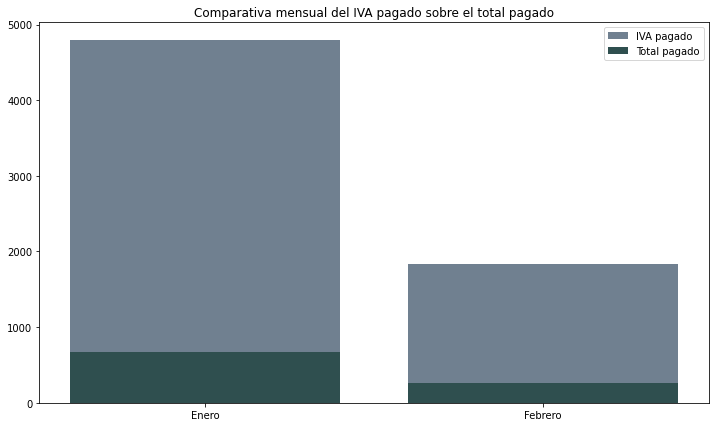

In [ ]:
#Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.
plt.figure(figsize = (12,7))

meses_df = pd.DataFrame(ventas_df[["mes","total_pagado","IVA"]].copy())
meses_df["total_pagado"] = meses_df.groupby("mes")["total_pagado"].transform("sum")
meses_df["IVA"] = meses_df.groupby("mes")["IVA"].transform("sum")
meses_df.drop_duplicates(subset= "mes").reset_index(inplace= True)

plt.bar(meses_df["mes"], meses_df["total_pagado"], color="slategray" )
plt.bar(meses_df["mes"], meses_df["IVA"], color= "darkslategray")
plt.legend( ["IVA pagado", "Total pagado"])
plt.title("Comparativa mensual del IVA pagado sobre el total pagado")
plt.show()

In [ ]:
#Determina el valor de la covarianza de ambas variables. 

#Genero una tabla de varianzas
print(ventas_df[["total_pagado","IVA"]].cov())

#Calculando las varianzas de cada variable, para verificar que la covarianza es 526.7688
#Se ve de manera clara en la tabla anterior (donde se cruzan ambas variables) pero de todas formas se calcula.

print("\nVar de total_pagado: {}\n".format(ventas_df["total_pagado"].var()))
print("\nVar de IVA {}".format(ventas_df["IVA"].var()))


              total_pagado         IVA
total_pagado   3356.593556  526.768808
IVA             526.768808  100.529919

Var de total_pagado: 3356.5935555555566


Var de IVA 100.52991919191919


Esta varianza positiva de 526.768808 denota que ambas variables se comportan de forma similar y tienen una relación creciente entre si. 

Esto era de presuponer, ya que el monto total tiene incluido dentro de sus valores cierta proporción de IVA y, por lo tanto, es una variable dependiente de la misma. 

Se podrá ver gráficamente en la siguiente celda.

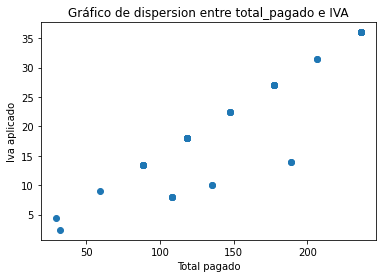

In [ ]:
plt.scatter(ventas_df["total_pagado"],ventas_df["IVA"])
plt.xlabel("Total pagado")
plt.ylabel("Iva aplicado")
plt.title("Gráfico de dispersion entre total_pagado e IVA")
plt.show()